In [1]:
import numpy as np 
import pandas as pd 
from collections import Counter
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

In [2]:
#listings_csv descrito e fazendo uma amostragem.

listings_file = 'F:\FIAPdes4\dados\listings.csv'

# Colunas que teoricamente vamos utilizar
columns = ['price',
           'summary',
           'neighbourhood_group_cleansed',
           'property_type',
           'room_type',
           'price',
           'number_of_reviews',
           'instant_bookable',
           'review_scores_rating',
           'beds',
           'bedrooms',
           'bathrooms',
           'accommodates',
           'amenities',
           'cancellation_policy',
           'reviews_per_month',
           'latitude',
           'longitude',
           'cleaning_fee',
           'security_deposit',
          'minimum_nights',
          'host_listings_count']

df = pd.read_csv(listings_file, usecols=columns)

df.head()

,summary,host_listings_count,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,...,amenities,price,security_deposit,cleaning_fee,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month
0,Pls note that special rates apply for Carnival...,2.0,NaN,-22.96592,-43.17896,Condominium,Entire home/apt,5,1.0,2.0,...,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$332.00,$0.00,$378.00,4,243,93.0,t,strict_14_with_grace_period,2.13
1,"Our apartment is a little gem, everyone loves ...",3.0,NaN,-22.97712,-43.19045,Apartment,Entire home/apt,2,1.0,1.0,...,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$160.00,"$1,000.00",$250.00,7,235,94.0,f,strict_14_with_grace_period,2.04
2,This nice and clean 1 bedroom apartment is loc...,1.0,NaN,-22.98302,-43.21427,Apartment,Entire home/apt,3,1.0,1.0,...,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$273.00,$0.00,$84.00,2,271,96.0,t,strict_14_with_grace_period,2.38
3,This cosy apartment is just a few steps away ...,1.0,NaN,-22.98816,-43.19359,Apartment,Entire home/apt,3,1.5,1.0,...,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$378.00,"$1,050.00",$172.00,2,169,94.0,f,strict_14_with_grace_period,2.28
4,Our newly renovated studio is located in the b...,1.0,NaN,-22.98127,-43.19046,Loft,Entire home/apt,2,1.0,1.0,...,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",$130.00,$400.00,$140.00,3,316,98.0,f,strict_14_with_grace_period,2.84


In [5]:
#todos os campos que são nulos no dataset
df.isna().sum()
#estatísticas básicas do dataset airbnb
df.describe()
#tipos de colunas
df.info()

,host_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,number_of_reviews,review_scores_rating,reviews_per_month
count,33695.000000,0.0,33715.000000,33715.000000,33715.000000,33661.000000,33673.000000,33667.000000,33715.000000,33715.000000,18293.000000,19149.000000
mean,7.347559,NaN,-22.965208,-43.254228,4.199941,1.694765,1.646126,2.574242,4.789826,9.374344,94.777565,0.707232
std,32.194777,NaN,0.035244,0.097488,2.625252,1.508228,1.075649,2.121490,22.640328,24.815311,9.141386,0.927453
min,0.000000,NaN,-23.073400,-43.737090,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,20.000000,0.010000
25%,1.000000,NaN,-22.984710,-43.323360,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,93.000000,0.110000
50%,1.000000,NaN,-22.970850,-43.200220,4.000000,1.000000,1.000000,2.000000,2.000000,1.000000,98.000000,0.340000
75%,3.000000,NaN,-22.946725,-43.187085,6.000000,2.000000,2.000000,3.000000,4.000000,6.000000,100.000000,0.980000
max,1259.000000,NaN,-22.750380,-43.104060,160.000000,200.000000,20.000000,69.000000,1123.000000,372.000000,100.000000,10.080000


In [3]:
# Nos campos numéricos, substituir os valores nulos por 0
df.review_scores_rating.fillna(0, inplace=True)

# remover o $
df.price = df.price.str.replace('$', '').str.replace(',', '').astype(float)

# Remover registros que estão com valores nulos em bathrooms, bedrooms e beds
df.dropna(subset=['bathrooms', 'bedrooms', 'beds'], inplace=True)


C:\Users\edu\AppData\Local\Temp\ipykernel_88584\677663314.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.price = df.price.str.replace('$', '').str.replace(',', '').astype(float)


In [13]:
#nesse, vimos que a maioria do campo property_value é apartamento, quase 80% do total:
tipo_ac_df = df.property_type.value_counts(normalize = True)

print(tipo_ac_df)


Apartment                 0.764499
House                     0.103854
Condominium               0.055022
Serviced apartment        0.021455
Loft                      0.018450
Guest suite               0.006011
Bed and breakfast         0.004166
Guesthouse                0.003988
Villa                     0.003273
Hostel                    0.003035
Other                     0.002797
Hotel                     0.002678
Townhouse                 0.001904
Aparthotel                0.001756
Cottage                   0.000952
Chalet                    0.000922
Earth house               0.000863
Boutique hotel            0.000863
Tiny house                0.000803
Boat                      0.000684
Bungalow                  0.000298
Cabin                     0.000298
Nature lodge              0.000298
Casa particular (Cuba)    0.000298
Island                    0.000149
Treehouse                 0.000119
Hut                       0.000089
Castle                    0.000089
Farm stay           

In [14]:
#retirando os campos que não serão utilizados

data = df[['price',
           'room_type',
           'review_scores_rating',
           'beds',
           'bedrooms',
           'bathrooms',
           'accommodates'
          ]]

In [15]:
# get_dummies function para transformar os valores em colunas, e os valores das colunas em 1 ou 0
room_type = pd.get_dummies(data.room_type).astype(int)

# alterar a coluna original para transformar em colunas
data = data.drop(['room_type'], axis = 1)
data = pd.concat((data, room_type), axis = 1)

In [16]:
data.head()

,price,review_scores_rating,beds,bedrooms,bathrooms,accommodates,Entire home/apt,Hotel room,Private room,Shared room
0,332.0,93.0,2.0,2.0,1.0,5,1,0,0,0
1,160.0,94.0,2.0,1.0,1.0,2,1,0,0,0
2,273.0,96.0,2.0,1.0,1.0,3,1,0,0,0
3,378.0,94.0,2.0,1.0,1.5,3,1,0,0,0
4,130.0,98.0,1.0,1.0,1.0,2,1,0,0,0


In [17]:
#https://www.sharpsightlabs.com/blog/scikit-train_test_split/
# import train_test_split , para separar os dados de treino e teste.
from sklearn.model_selection import train_test_split
# import metrics 
from sklearn.metrics import mean_squared_error, r2_score

# create target and features. No treino, colocamos todas as colunas, menos o preço, pois vamos verificar a importância a partir do preço. Essa coluna é a característica.
a = data.drop(['price'], axis = 1)
#No teste, utilizaremos o preço, que é o que temos que descobrir, ou seja, a variação desse campo em relação aos demais. Esse é o alvo
b = data.price
#A tabela (dataframe) é a melhor forma de utilizarmos x e y, pois nesse caso, as duas tem que ter a mesma quantidade de linhas.

# Separar os dados de treino e teste. O tamanho é de 20% dos dados. Random_state é o modo em que ele ordena para fazer os testes. 
X_train, X_test, y_train, y_test = train_test_split(a, b, test_size=0.2, random_state=2)

In [18]:
# Normalizar as características ( a )
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor

#criamos um objeto dummy regressor, para fazer regressão.
dummy_regressor = DummyRegressor()
dummy_regressor.fit(X_train, y_train)

#criamos um objeto do sklearn, um standardscaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)




In [19]:
#Preços preditos pelo dummyRegressor, que é a média de preços encontrada.
dummy_regressor.predict(X_test)

array([654.43107424, 654.43107424, 654.43107424, ..., 654.43107424,
       654.43107424, 654.43107424])

In [20]:
#Linear Regression
from sklearn import linear_model
from sklearn import metrics

# linear regression testing
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
linear = metrics.r2_score(y_test, reg.predict(X_test))

y_test_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)

print (f"Linear Regression: {round(linear, 5)}")

Linear Regression: 0.14433


In [21]:
# Modelo rigde
ridge = linear_model.Ridge()
ridge.fit(X_train, y_train)
ridge_result = metrics.r2_score(y_test, ridge.predict(X_test))

y_test_pred = ridge.predict(X_test)
y_train_pred = ridge.predict(X_train)

print (f"Linear Ridge: {round(ridge_result, 5)}")

Linear Ridge: 0.14436


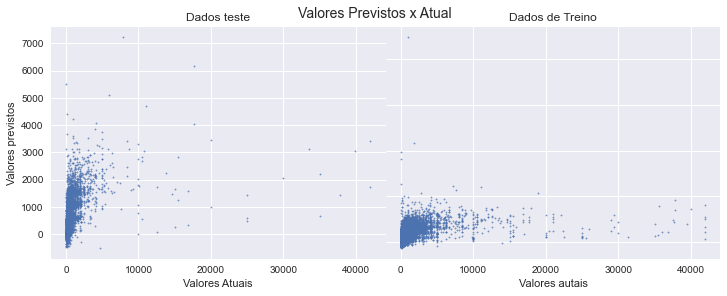

In [22]:
#mostrar os valores dos dados autais e os dados que serão usados para treino.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Valores Previstos x Atual', fontsize=14, y=1)
plt.subplots_adjust(top=0.93, wspace=0)
    
ax1.scatter(y_test, y_test_pred, s=2, alpha=0.7)
ax1.plot(list(range(2,8)), list(range(2,8)), color='black', linestyle='--')
ax1.set_title('Dados teste')
ax1.set_xlabel('Valores Atuais')
ax1.set_ylabel('Valores previstos')
    
ax2.scatter(y_train, y_train_pred, s=2, alpha=0.7)
ax2.plot(list(range(2,8)), list(range(2,8)), color='black', linestyle='--')
ax2.set_title('Dados de Treino')
ax2.set_xlabel('Valores autais')
ax2.set_ylabel('')
ax2.set_yticklabels(labels='')

plt.show()

In [23]:
#https://github.com/carlosfab/sigmoidal_ai/blob/master/XGBoost%20-%20aprenda%20este%20algoritmo%20de%20Machine%20Learning%20em%20Python.ipynb
import xgboost as xgb
# cria o modelo de predição do xgb regressor
modelo = xgb.XGBRegressor()

In [24]:
#https://www.projectpro.io/recipes/find-optimal-parameters-using-gridsearchcv-for-regression
#https://www.kaggle.com/code/stuarthallows/using-xgboost-with-scikit-learn

from sklearn.model_selection import GridSearchCV

# criar grid de parâmetros, para aprender e selecionar o melhor parâmetro
param_grid = {'n_estimators': [100, 150, 200, 300], #modelos ou funções que vamos passar
              'learning_rate': [0.01, 0.05, 0.1],  #taxa de aprendizado
              'max_depth': [4,6,8,10],
              'colsample_bytree': [0.6, 0.7, 1],
              'gamma': [0.0, 0.1, 0.2]}

# instantiate the tuned random forest
modelo_grid = GridSearchCV(modelo, param_grid, cv=2, n_jobs=-1) #njobs=-1 quer dizer que pode utilizar toda a cpu. cv é o número de divisões que ele faz para a validação cruzada.

# treinar o grid do modelo
modelo_grid.fit(X_train, y_train)

# Imprimir os melhores estimos
print(modelo_grid.best_estimator_)
# Imprimir os melhores parâmetros
print(modelo_grid.best_params_)
# Imprimir os melhores scores
print(modelo_grid.best_score_)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
{'colsample_bytree': 0.6, 'gamma': 0.0, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300}
0.22502950590493975


In [47]:
# Iniciar o xgboost com os parâmetros obtidos na célula anterior
modelo = xgb.XGBRegressor(colsample_bytree=0.6, gamma=0.0, learning_rate=0.01, 
                           max_depth=4, n_estimators=300, random_state=4)

# Treinar o modelo
modelo.fit(X_train, y_train)

# Predizer os valores usando o predict
y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

In [32]:
# Erro médio absoluto do modelo
RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"RMSE: {round(RMSE, 5)}")

RMSE: 1159.54724


In [46]:
print(X_train.size)
print(X_test.size)
print(y_train.size)
print(y_test.size)

241956
60489
26884
6721


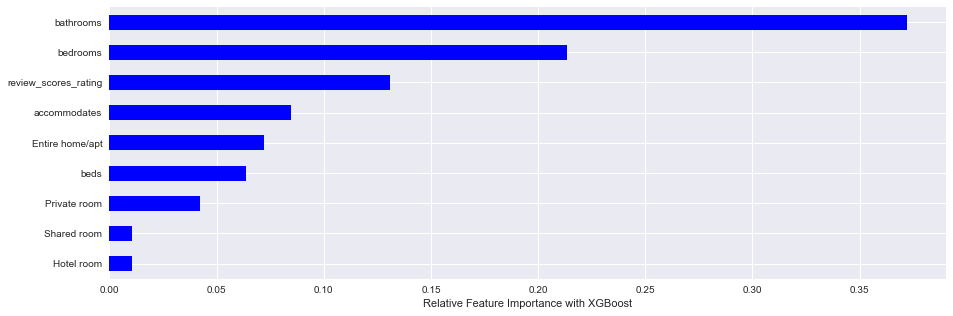

In [28]:
# características mais importantes nos dados, de acordo com o preço
features_importance = pd.Series(modelo.feature_importances_, index=a.columns)
features_importance.nlargest(15).sort_values().plot(kind='barh', color='blue', figsize=(15,5))
plt.xlabel('Relative Feature Importance with XGBoost');

In [69]:
#retirando o valor de 200 banheiros, que podem estar errados.
df2 = df[data.bathrooms != 200]

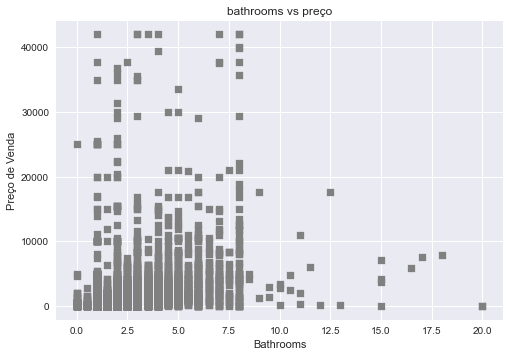

In [70]:
#Analisando os fatores mais importantes, conforme gráfico anterior, o número de banheiros:
plt.scatter(df2.bathrooms, df2.price, c = "gray", marker = "s")
plt.title("bathrooms vs preço")
plt.xlabel("Bathrooms")
plt.ylabel("Preço de Venda")
plt.show()

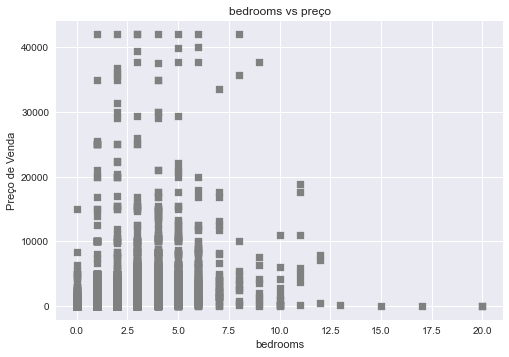

In [71]:
#Analisando os fatores mais importantes, conforme gráfico anterior, o número de quartos:
plt.scatter(df2.bedrooms, df2.price, c = "gray", marker = "s")
plt.title("bedrooms vs preço")
plt.xlabel("bedrooms")
plt.ylabel("Preço de Venda")
plt.show()